# Exercices

# 1. How would you define clustering? Can you name a few clustering algorithms?

Clustering is the task of identifying similar instances and group them together. The notion of similarity depends on the task at hands: for example, in some cases, two nearby instances will be considered similar, while in others similar instances may be far apart as long as they belong to the same densely packed group. A few clustering algorithms could be K-Means, DBSCAN, Agglomerative Clustering, Gaussian Mixture, etc. .

# 2. What are some of the main applications of clustering algorithms?

Some of the main applications of clustering algorithms:
* Customer Segmentation (create groups of customers with similar behavior).
* Semi-supervised learning (propagate all the instances in the same clusters).
* Anomaly detection (detect a new instance that does not belong to any classes).
* Data Analysis
* Image Segmentation (by clustering pixels using their color).
* Dimensionality Reduction.
* Density Estimation.

# 3. Describe two techniques to select the right number of clusters when using K-Means.

When using K-Means, we have to select beforehand the number of clusters we want. To do that, we can use:
* Elbow Method, which uses the inertia (the mean squared distance from each instance to its neearest centroid). The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. This is usally close to the the optimal number of clusters.
* Silhouette score, which is the mean silhouette coefficient over all the instances. Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. The size of each clusters can be drawn with the Silhouette diagram.

# 4. What is label propagation? Why would you implement it, and how?

Label propagation refers to the fact of assigning labels to previously unlabeled data points. At the start, a subset of the data points have labels (or classifications). These labels are propagated to the unlabeled points throughout the course of the algorithm.

Label propagation denotes a few variations of semi-supervised graph inference algorithms.

A few features available in this model:
* Can be used for classification and regression tasks
* Kernel methods to project data into alternate dimensional spaces

# 5. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

Two clustering algorithms that can scale to large datasets:
* Agglomerative clustering
* BIRCH if the number of features is not too large (< 20).
* Mini-batch K-Means

Two clustering algorithms that can look for regions of high density:
* DBSCAN
* Gaussian Mixtures
* Mean-Shift

# 6. Can you think of a use case where active learning would be useful? How would you implement it?

Active learning is when a human experts interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them. There are many different strategies for active learning, but one of the most common ones is called *uncertainty sampling*.
* 1: The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.
* 2: The instances for which the model is most uncertain (when its estimated probability is lowest) are given to the expert to be labeled.
* 3: Iteration of the process until the performance improvement stops being worth the labeling effort.

Other strategies include labeling the instances that would result in the largest model change, or the lastest drop in the model's validation error, or the instances that different models disagree on (e.g., an SVM, or a RandomForest).

# 7. What is the difference between anomaly detection and novelty detection?

*Anomaly detection* also called *outlier detection* is the task of detecting instances that deviate strongly from the norm.  They are called *anomalies* or *outliers* while the normal instances are called *inliers*.

Outlier detection
* The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.

Novelty detection
* The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.

Some algorithms work best for anomaly detection (e.g. Isolation Forest), while others are better suited for novelty detection (e.g. one-class SVM).

# 8. What is a Gaussian mixture? What tasks can you use it for?

A *Gaussian Mixture model* (GMM) is a probabilitistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density, and orientation. When we observe an instance, we know it was generated from one of the Gaussian distributions, but we are not told which one, and we do not know what the parameters of these distributions are.

We can use for the following tasks:
* Anomaly detection
* Novelty detection
* Clustering
* Density estimation

# 9. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?

The two techniques are :
* Bayesian Information Criterion (BIC)
* Akaike Information Criterion (AIC)

Both of them are Theroretical Information Criterions.

Both the BIC and the AIC penalize models that have more parameters to learn (e.g. more clusters) and reward models that fit the data well. They often end up selecting the same model. When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite as well (this is espcially true for large datasets).

Another technique is to use a Bayesian Guassian Mixture Model, which automatically selects the number of clusters.

# 10. The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

In [1]:
#Libraries
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
import pandas as pd
import numpy as np
import multiprocessing
multiprocessing.set_start_method('forkserver')

In [2]:
RANDOM_STATE = 42 #Global random state, same as np.random.seed(42)

In [3]:
X,y = fetch_olivetti_faces(return_X_y=True,shuffle=True,random_state=RANDOM_STATE)

In [4]:
X.shape #400 grayscale, 64x64-pixel images.

(400, 4096)

In [5]:
# Creation of the train and test sets

SSS = StratifiedShuffleSplit(n_splits=2, test_size=0.2,random_state=RANDOM_STATE) #Initialization of the StratifiedShuffleSplit

print(f"Number of splits: {SSS.get_n_splits(X, y)}")

#Splitting train and test sets
for train_index, test_index in SSS.split(X, y):
    X_train_validation, X_test = X[train_index], X[test_index]
    y_train_validation, y_test = y[train_index], y[test_index]

Number of splits: 2


In [6]:
print(f"Train_validation set shape: {X_train_validation.shape}")
print(f"Test set shape: {X_test.shape}")

Train_validation set shape: (320, 4096)
Test set shape: (80, 4096)


In [7]:
# Creation of the validation set
SSS = StratifiedShuffleSplit(n_splits=2, test_size=0.2,random_state=RANDOM_STATE) #Initialization of the StratifiedShuffleSplit

#Splitting train and validation sets
for train_index, validation_index in SSS.split(X_train_validation, y_train_validation):
    X_train, X_validation = X_train_validation[train_index], X_train_validation[validation_index]
    y_train, y_validation = y_train_validation[train_index], y_train_validation[validation_index]

In [8]:
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_validation.shape}")

Train set shape: (256, 4096)
Validation set shape: (64, 4096)


In [9]:
del X_train_validation,y_train_validation #TO FREE UP MEMORY

In [10]:
# Librairies to plot the images
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm

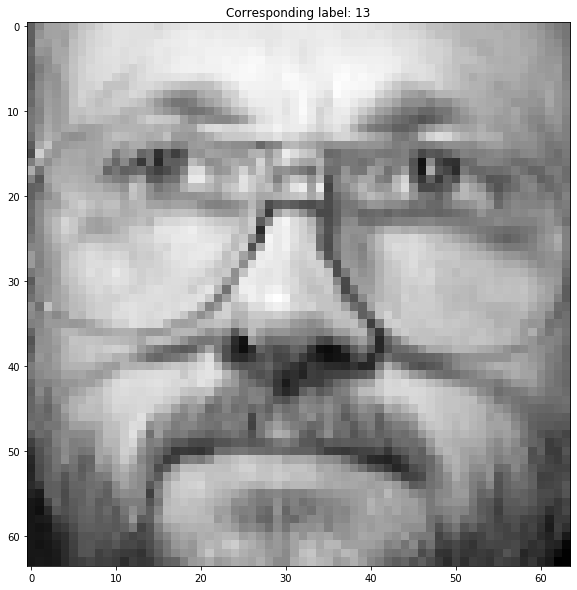

In [11]:
#Example of face
plt.figure(figsize=(10,10))
plt.imshow(X[250].reshape(-1,64), cmap=plt.cm.gray,
           interpolation='nearest')
plt.title(f"Corresponding label: {y[250]}")
plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [13]:
inertia = []
number_of_cluster = []
k_range = range(5, 150, 5)

for i in k_range:
    number_of_cluster.append(i)
    kmeans = KMeans(n_clusters=i,n_jobs=-1)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

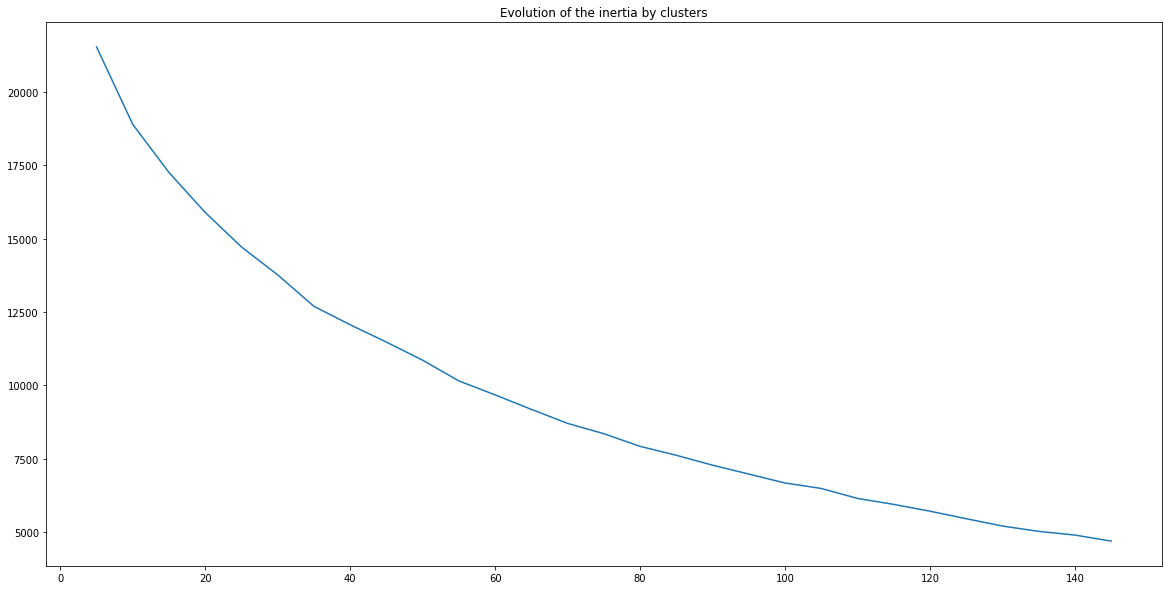

In [14]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
plt.plot(number_of_cluster,inertia)
plt.title("Evolution of the inertia by clusters")
plt.show()

In [15]:
silhouettescore = []
number_of_cluster = []
k_range = range(5, 150, 5)
for i in k_range:
    number_of_cluster.append(i)
    kmeans = KMeans(n_clusters=i,n_jobs=-1)
    kmeans.fit(X)
    silhouettescore.append(silhouette_score(X,kmeans.labels_))

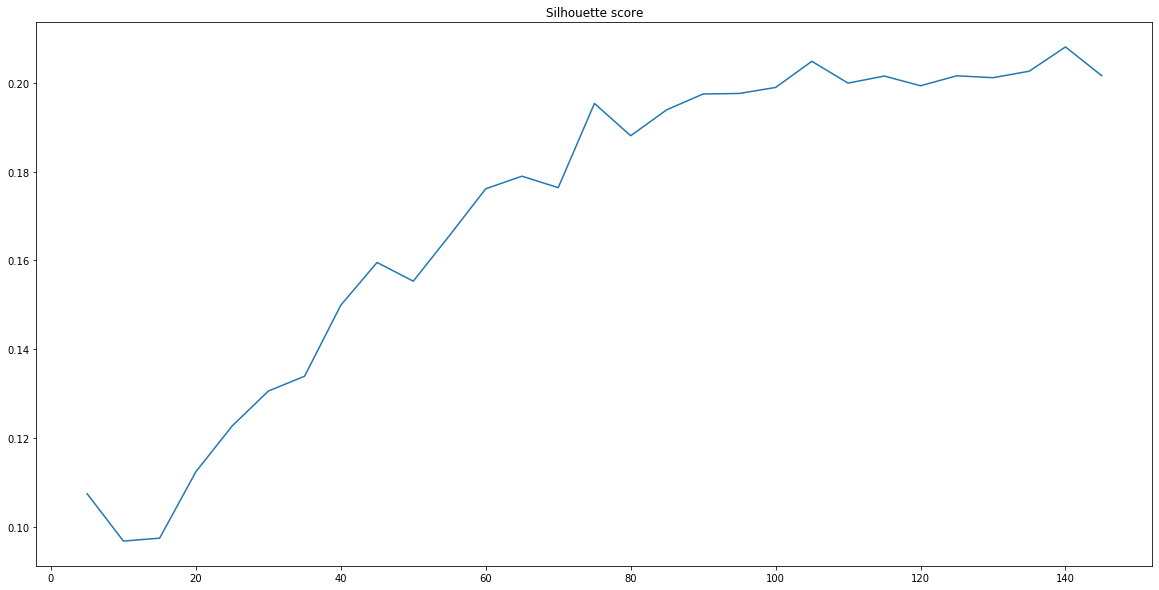

In [16]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
plt.plot(number_of_cluster,silhouettescore)
plt.title("Silhouette score")
plt.show()

For n_clusters = 118 The average silhouette_score is : 0.19532186
For n_clusters = 119 The average silhouette_score is : 0.19642791
For n_clusters = 120 The average silhouette_score is : 0.194701


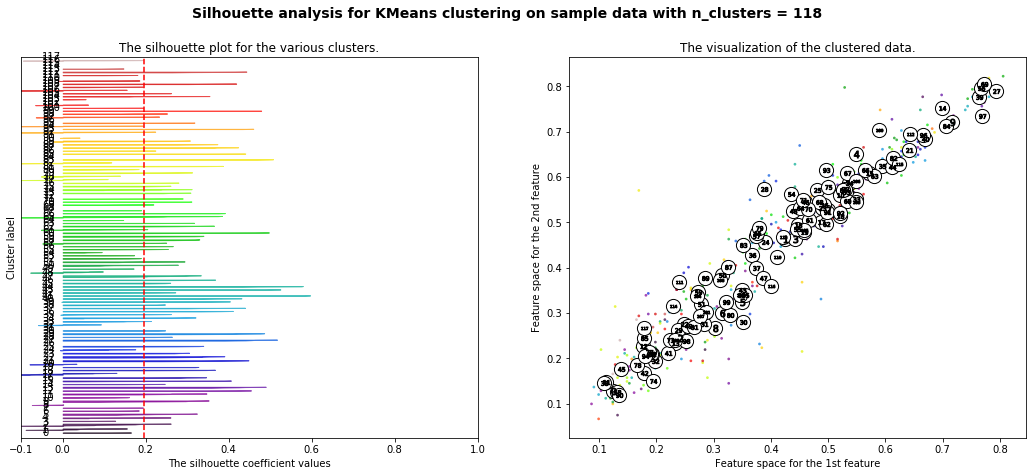

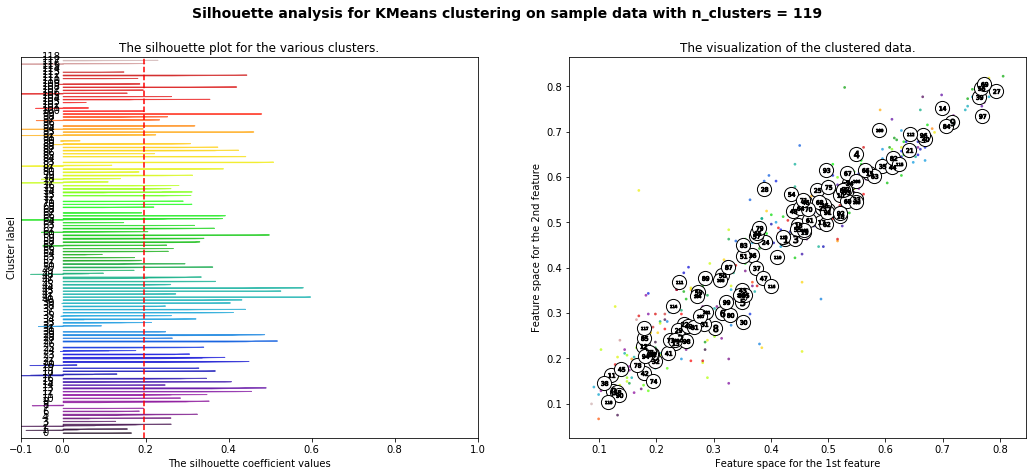

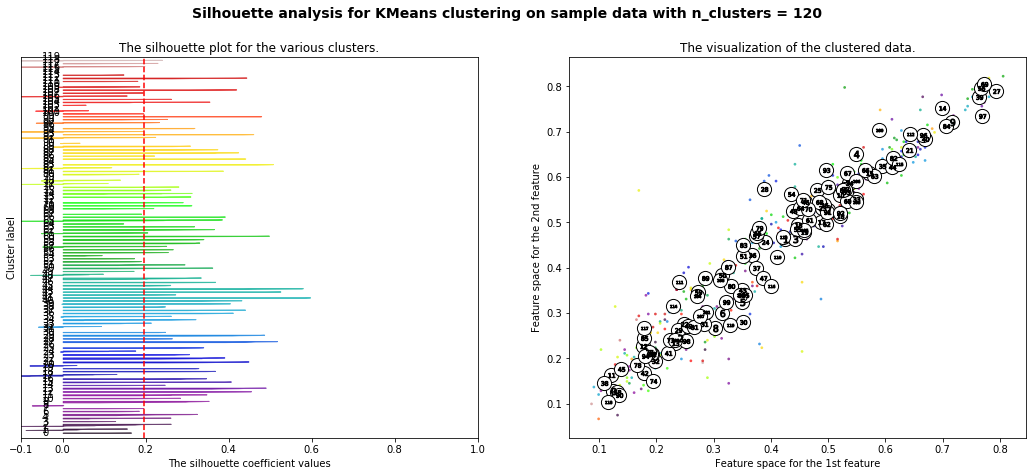

In [17]:
for n_clusters in range(118,121):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Based on the silhouette analysis, a good number would be between 120!

In [18]:
kmeans = KMeans(n_clusters=120,random_state=RANDOM_STATE)

In [19]:
labels = kmeans.fit_predict(X_train)

In [20]:
label_0 = [x for x in np.where(labels == 0)]
label_1 = [x for x in np.where(labels == 1)]
label_2 = [x for x in np.where(labels == 2)]

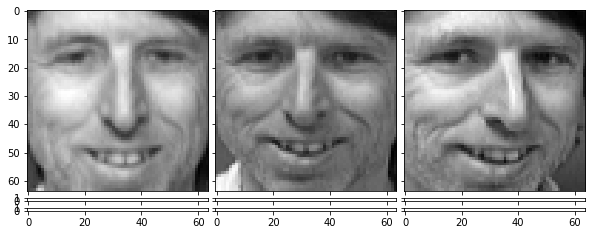

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 3x3 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, label_0[0][0:6]): #For images with label 0!
    # Iterating over the grid returns the Axes.
    ax.imshow(X_train[im].reshape(-1,64),cmap=plt.cm.gray)

plt.show()

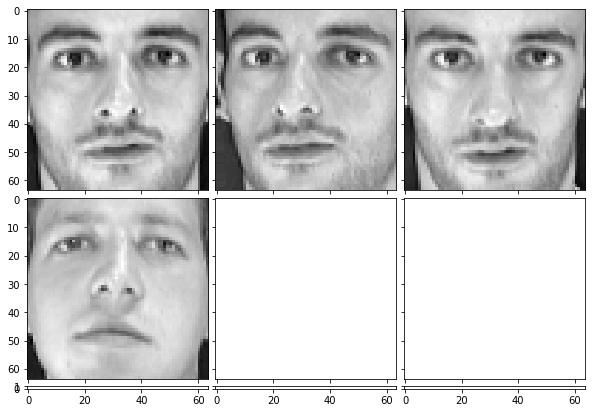

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 3x3 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, label_1[0][0:6]): #For images with label 1!
    # Iterating over the grid returns the Axes.
    ax.imshow(X_train[im].reshape(-1,64),cmap=plt.cm.gray)

plt.show()

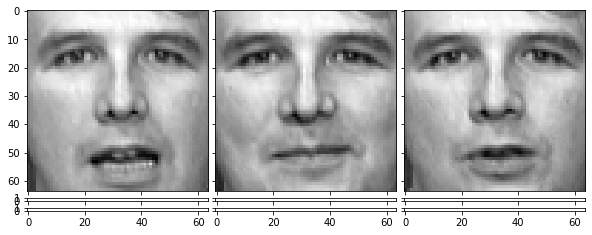

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 3x3 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, label_2[0][0:6]): #For images with label 2!
    # Iterating over the grid returns the Axes.
    ax.imshow(X_train[im].reshape(-1,64),cmap=plt.cm.gray)

plt.show()

# 11. Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
lr_clf = LogisticRegression(random_state=RANDOM_STATE,n_jobs=-1) #The Logistic Regression model

In [26]:
lr_clf.fit(X_train,y_train) #We fit the data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [27]:
X_predicted = lr_clf.predict(X_validation)

In [28]:
accuracy_score(y_validation,X_predicted) #The accuracy score is 0.953125!

0.953125

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipeline = Pipeline([
    ("KMeans",KMeans(n_clusters=40,random_state=RANDOM_STATE,n_jobs=-1)),
    ("lr",LogisticRegression(random_state=RANDOM_STATE,n_jobs=-1))
])

In [31]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=40, n_init=10, n_jobs=-1,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l2',
                                    random_state=42, solver='lbfgs', tol=0.0001,
                                    verbose=0, warm_start=False))],
         verbose=False)

In [32]:
pipeline.score(X_validation,y_validation) #0.9375!

0.9375

In [33]:
from sklearn.model_selection import GridSearchCV #Importing GridSearchCV

In [34]:
param_grid = {"KMeans__n_clusters":range(2,70)} #Param Grid

In [35]:
grid_clf = GridSearchCV(pipeline,param_grid=param_grid,n_jobs=-1,cv=3,verbose=1) #GridSearchCV

In [36]:
grid_clf.fit(X_train,y_train) #Fitting...

Fitting 3 folds for each of 68 candidates, totalling 204 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('KMeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=40, n_init=10,
                                               n_jobs=-1,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                             

In [37]:
grid_clf.best_params_

{'KMeans__n_clusters': 45}

In [38]:
grid_clf.best_score_

0.8398996808025535

In [39]:
grid_clf.score(X_validation,y_validation) #The score is lower...

0.890625

In this case, the clustering is not useful to improve the model (but it can be useful to label the data).

# 12. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the method), and visualize them (if you used PCA, you will need to use its method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the method for normal images and for anomalies).

In [40]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [41]:
#pipeline = Pipeline([
#    ("PCA",PCA(n_components=0.99,random_state=RANDOM_STATE)),
#    ("GMM",GaussianMixture(random_state=RANDOM_STATE,n_components=40))
#])
#pipeline.fit(X)

In [42]:
#PCA First
pca = PCA(random_state=RANDOM_STATE,n_components=0.99) #Preserving 99% of the variance...

In [43]:
X_PCA = pca.fit_transform(X)

In [44]:
print(f"Shape before PCA: {X.shape}, shape after PCA: {X_PCA.shape}")

Shape before PCA: (400, 4096), shape after PCA: (400, 260)


In [45]:
#GaussianMixture
gmm = GaussianMixture(random_state=RANDOM_STATE,n_components=40)

In [46]:
gmm.fit(X_PCA)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=40, n_init=1,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [47]:
samples = gmm.sample(6)

In [48]:
samples_gmm = {}
for idx,sample in enumerate(samples[0]):
    samples_gmm[idx] = pca.inverse_transform(sample)

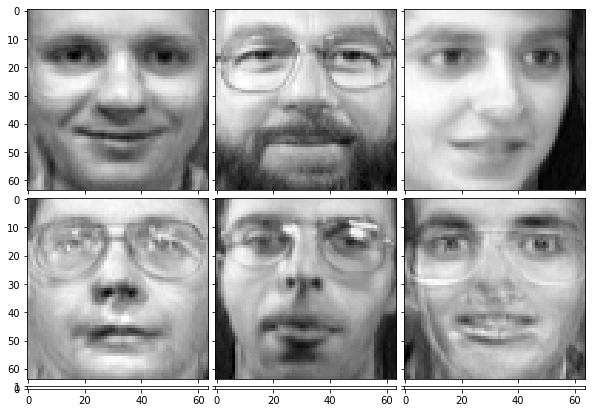

In [49]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 3x3 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, samples_gmm): #For images with label 1!
    # Iterating over the grid returns the Axes.
    ax.imshow(samples_gmm[im].reshape(-1,64),cmap=plt.cm.gray)

plt.show()

In [50]:
def shift_img(img,direction="up"):
    
    if direction == "up":
        img_copy = np.roll(img, -1, axis=0).reshape(784,) # up
    elif direction == "down":
        img_copy = np.roll(img, 1, axis=0).reshape(784,) # down
    elif direction == "right":    
        img_copy = np.roll(img.reshape(28,28), 1, axis=1).reshape(784,) # right
    elif direction == "left":
        img_copy = np.roll(img.reshape(28,28), -1, axis=1).reshape(784,) # left
    
    return img_copy

In [51]:
img_shifted = {}

for idx,img in enumerate(samples_gmm):
    
    img_shifted[idx] = np.roll(samples_gmm[idx].reshape(-1,64),1,axis=1) #Shifting right

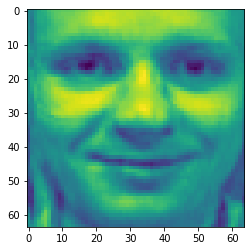

In [52]:
plt.imshow(img_shifted[0])

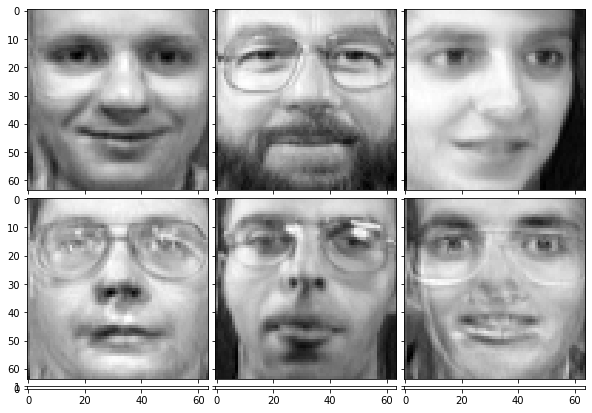

In [53]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 3x3 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img_shifted):
    # Iterating over the grid returns the Axes.
    ax.imshow(img_shifted[im].reshape(64,64),cmap=plt.cm.gray)

plt.show()

In [54]:
new_img_pca = {}
for i in img_shifted:
    new_img_pca[i] = pca.transform(img_shifted[i].reshape(1,-1)) #Transform using the PCA transformation

In [55]:
densities = gmm.score_samples(X_PCA) #Get the densities

In [56]:
density_threshold = np.percentile(densities,4) #The threshold for 4%

In [57]:
densities_new_img_pca = {}
for i in new_img_pca:
    densities_new_img_pca[i] = gmm.score_samples(new_img_pca[i]) #The score for the sampled observations

In [58]:
densities_new_img_pca

{0: array([-888656.832528]),
 1: array([-1454847.15075698]),
 2: array([-6889421.42661528]),
 3: array([-2366959.87572267]),
 4: array([-3210264.16917725]),
 5: array([-2035897.19584699])}

In [59]:
anomalies = X_PCA[densities < density_threshold]

In [60]:
["Anomaly" if i < density_threshold else "OK" for i in densities_new_img_pca]

['Anomaly', 'Anomaly', 'Anomaly', 'Anomaly', 'Anomaly', 'Anomaly']

# 13. Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

In [61]:
#PCA First
pca = PCA(random_state=RANDOM_STATE,n_components=0.99) #Preserving 99% of the variance...

In [62]:
X_PCA = pca.fit_transform(X)

In [63]:
loss = ((X - pca.inverse_transform(X_PCA)) ** 2).mean()

In [66]:
loss #Resulting from the reconstruction error.

0.00019257102